In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [8]:
data = pd.read_csv('cancer_data.csv')# считываем с помощью метода read_csv и помещяем данные в data

2. Бинарная классификация:

Привести описание датасета.

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_SE               569 non-null    float64
 13  texture_SE              548 non-null    float64
 14  perimeter_SE            569 non-null    fl

In [11]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
count,5.690000e+02,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,...,569.000000,548.000000,569.000000,569.000000,521.000000,569.000000,569.000000,569.000000,504.000000,569.000000
mean,3.051467e+07,14.113021,19.293431,91.877909,653.288576,0.096087,0.104536,0.088620,0.048837,0.181091,...,16.261896,25.660803,107.211142,880.163796,0.132090,0.254557,0.271681,0.114377,0.288856,0.084012
std,1.250417e+08,3.506148,4.327287,24.162787,349.476899,0.013924,0.052674,0.079011,0.038578,0.027899,...,4.841175,6.202916,33.621975,570.498628,0.022685,0.158042,0.208298,0.065760,0.062520,0.018151
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.691040e+05,11.700000,16.167500,75.170000,420.300000,0.086050,0.065260,0.029560,0.020360,0.161800,...,13.010000,21.017500,84.110000,515.300000,0.116600,0.146000,0.112500,0.064020,0.247650,0.071270
50%,9.060240e+05,13.370000,18.785000,86.340000,551.100000,0.095780,0.094530,0.061550,0.033700,0.178950,...,14.970000,25.370000,97.650000,686.500000,0.131200,0.211900,0.226700,0.100100,0.280650,0.080040
75%,8.910251e+06,15.780000,21.825000,103.800000,782.700000,0.104800,0.130500,0.131900,0.074040,0.195750,...,18.760000,29.675000,125.100000,1070.000000,0.145000,0.339900,0.385300,0.162500,0.317525,0.092110
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [12]:
data = data.drop('id',axis=1)
#data = data.drop('Unnamed: 32',axis=1)

Закодировать категориальные признаки при необходимости.

In [13]:
data['diagnosis'].value_counts()

diagnosis
B    358
M    211
Name: count, dtype: int64

In [14]:
data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})

C:\Users\nikit\AppData\Local\Temp\ipykernel_13796\803889414.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'] = data['diagnosis'].replace({'M': 0, 'B': 1})


In [15]:
data['diagnosis'].value_counts()

diagnosis
1    358
0    211
Name: count, dtype: int64

In [16]:
data = data.fillna(data.mean())

In [17]:
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

Разбить выборку на обучающую и тестовую.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_train)}")
print("--------------------")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_test)}")

Тренировочная выборка имеет 455 экземпляров и 30 признаков
Число разных классов --> [169 286]
--------------------
Тестовая выборка имеет 114 экземпляров и 30 признаков
Число разных классов --> [42 72]


Осуществить бинарную классификацию.
Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [20]:
def func_KNeighborsClassifier(x_train,y_train,x_test,y_test,n_n_neighbors: int, output_str: str ):
    ex_model_knn = KNeighborsClassifier(n_neighbors = n_n_neighbors, metric='euclidean')
    ex_model_knn.fit(x_train, y_train)
    y_pred  = ex_model_knn.predict(x_test)
    accuracy  = accuracy_score(y_test, y_pred )
    precision = precision_score(y_test, y_pred )
    recall = recall_score(y_test, y_pred )
    f1 = f1_score(y_test, y_pred )
    report = classification_report(y_test, y_pred)
    print(output_str)
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))
    print("\nReport:\n", report)
    confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion, display_labels=[0, 1])
    return disp

In [21]:
disp_Not_Norm = func_KNeighborsClassifier(X_train, y_train,X_test, y_test,2,"Метрики на ненормированных данных:")

Метрики на ненормированных данных:
Accuracy: 0.930
Precision: 0.957
Recall: 0.931
F1 Score: 0.944

Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Модель демонстрирует высокие показатели точности, полноты и F1 Score. Особенно высокие значения точности и F1 Score для положительного класса (1) указывают на то, что модель лучше распознает этот класс. Однако, несмотря на немного более низкую точность для класса 0, модель в целом показывает отличные результаты на ненормированных данных.

Нормализовать данные (`StandardScaler`или `MinMaxScaler`).

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить метрики на данных без нормализации и с применением нормализации.

In [23]:
disp_Norm = func_KNeighborsClassifier(X_train_scaled, y_train,X_test_scaled, y_test,2,"Метрики на нормированных данных:")

Метрики на нормированных данных:
Accuracy: 0.947
Precision: 0.971
Recall: 0.944
F1 Score: 0.958

Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



Text(0.5, 1.0, 'Матрица ошибок с нормализацией')

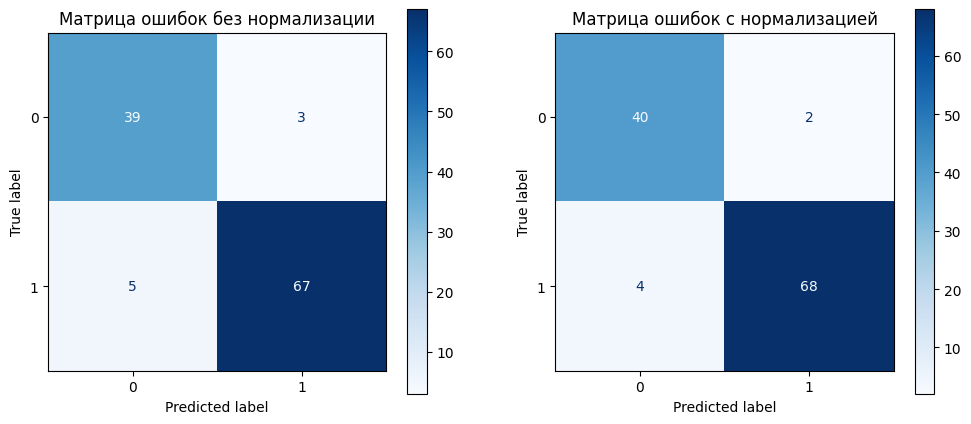

In [24]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp_Not_Norm.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок без нормализации')

disp_Norm.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с нормализацией')

Нормализация данных привела к улучшению всех основных метрик (не но сильно) производительности модели, особенно в классе 0. Подняла точность всего на один дополнительно верно предсказанный элемент в каждом классе.

Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений

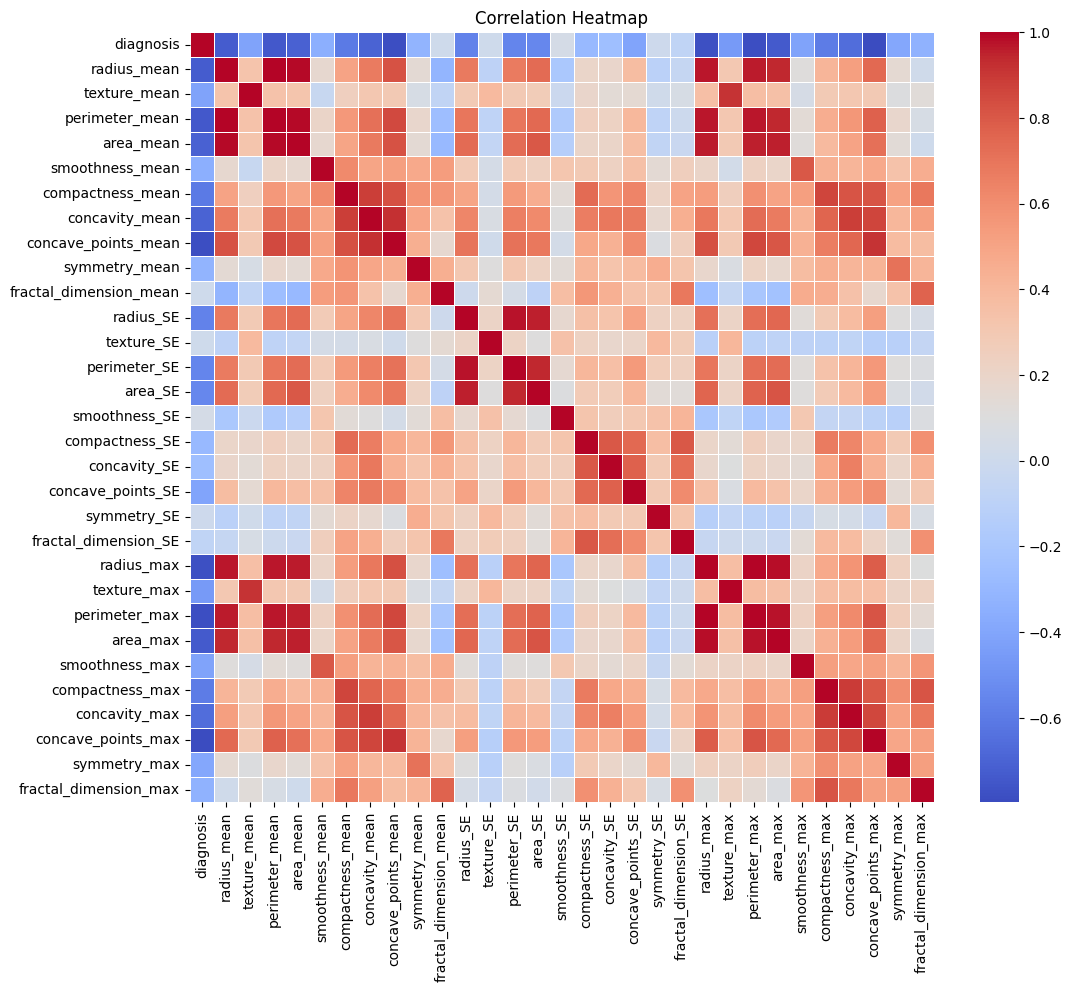

In [27]:
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

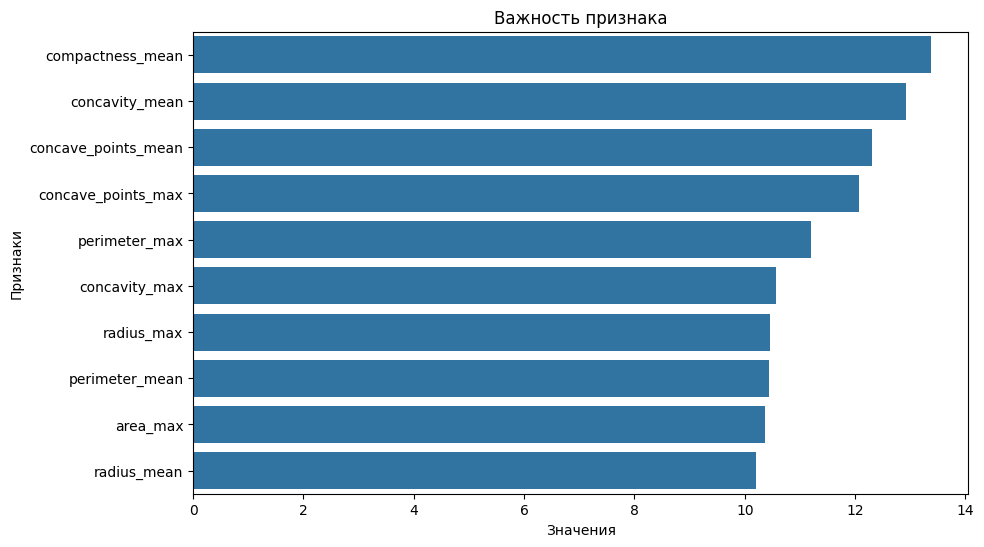

Наиболее важные признаки:
['compactness_mean', 'concavity_mean', 'concave_points_mean', 'concave_points_max', 'perimeter_max', 'concavity_max', 'radius_max', 'perimeter_mean', 'area_max', 'radius_mean']


In [28]:
correlation_matrix = data.drop(columns = ['diagnosis']).corr()
data_array = correlation_matrix.values

np.fill_diagonal(data_array, 0)
threshold = 0.5

filtered_corr = correlation_matrix[abs(correlation_matrix) > threshold]

feature_importance = filtered_corr.sum()

feature_importance = feature_importance.sort_values(ascending=False)

plot_threshold = 10

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[feature_importance > plot_threshold].values, y=feature_importance[feature_importance > plot_threshold].index)
plt.title('Важность признака')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.show()


selected_features = feature_importance[feature_importance.abs() > plot_threshold].index.tolist()
print("Наиболее важные признаки:")
print(selected_features)


In [29]:
len(data.columns)

31

In [30]:
len(selected_features)

10

In [31]:
X_train_selected  = X_train[selected_features]
X_test_selected  = X_test[selected_features]

- Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.

In [36]:
disp_Sel_features = func_KNeighborsClassifier(X_train_selected, y_train,X_test_selected, y_test,2,"Метрики на выбранных признаках:")

Метрики на выбранных признаках:
Accuracy: 0.939
Precision: 0.971
Recall: 0.931
F1 Score: 0.950

Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      0.93      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

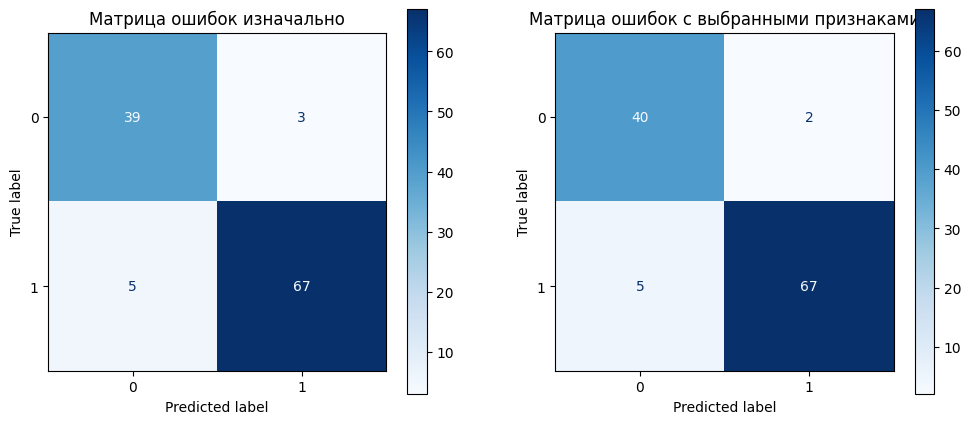

In [33]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp_Not_Norm.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

disp_Sel_features.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

Выбор признаков улучшает метрики по сравнению с ненормированными данными, но не достигает уровня нормированных данных. Наиболее заметные улучшения наблюдаются в точности предсказаний и F1 Score.

 - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
     > данных - исходных данных до разбиения с применением нормализации

In [34]:
def enumerationOfHyperparameters(x_train, y_train, x_test, y_test):
    train_accuracy = []
    test_accuracy = []
    
    for n in range(1, 10):
        model = KNeighborsClassifier(n_neighbors = n, metric='euclidean')
        model.fit(x_train, y_train)
        train_accuracy.append(model.score(x_train, y_train))
        test_accuracy.append(model.score(x_test, y_test))
    
    plt.plot(range(1, 10), train_accuracy, label='Тренировочная')
    plt.plot(range(1, 10), test_accuracy, label='Тестовая')
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    


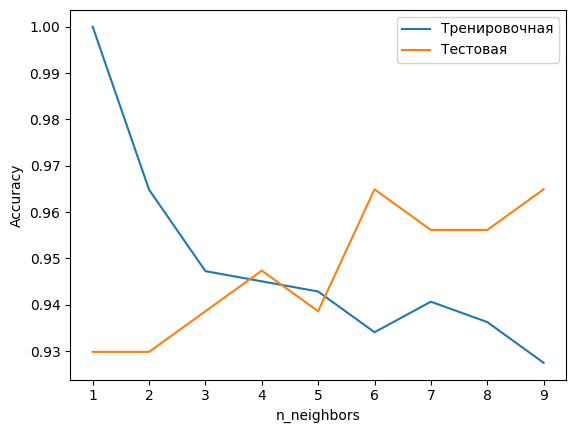

In [35]:
enumerationOfHyperparameters(X_train, y_train,X_test, y_test)

С увеличением n_neighbors увеличивается точнсть на тестовой выборке.

3. Многоклассовая классификация:

In [38]:
data = pd.read_csv('star_classification.csv')# считываем с помощью метода read_csv и помещяем данные в data

Привести описание датасета.

In [39]:
description_list = [
"Идентификатор объекта, уникальное значение, определяющее объект в каталоге изображений, используемом CAS",
 "Прямое восхождение (на эпоху J2000)",
 "Склонение (на эпоху J2000)",
 "Ультрафиолетовый фильтр в фотометрической системе",
 "Зеленый фильтр в фотометрической системе",
 "Красный фильтр в фотометрической системе",
 "Ближний инфракрасный фильтр в фотометрической системе",
 "Инфракрасный фильтр в фотометрической системе",
 "Номер прогона, используемый для идентификации конкретного сканирования",
 "Номер повторного прогона, указывающий, как было обработано изображение",
 "Номер камеры для идентификации линии сканирования внутри прогона",
 "Номер поля для идентификации каждого поля",
 "Уникальный идентификатор, используемый для оптических спектроскопических объектов (это означает, что 2 разных наблюдения с одним и тем же spec_obj_ID должны иметь одинаковый класс вывода)",
 "Класс объекта (галактика, звезда или квазарный объект)",
 "Красное смещение на основе увеличения длины волны",
 "Идентификатор пластины, идентифицирующий каждую пластину в SDSS",
 "Измененная юлианская дата, используемая для указания времени съемки конкретных данных SDSS",
 "Идентификатор волокна, определяющий волокно, направившее свет на фокальную плоскость в каждом наблюдении"
]
dtypes_column = data.dtypes
df_info = pd.DataFrame({'Тип': dtypes_column, 'Описание': description_list})
pd.set_option('display.max_colwidth', None)
df_info

,Тип,Описание
obj_ID,float64,"Идентификатор объекта, уникальное значение, определяющее объект в каталоге изображений, используемом CAS"
alpha,float64,Прямое восхождение (на эпоху J2000)
delta,float64,Склонение (на эпоху J2000)
u,float64,Ультрафиолетовый фильтр в фотометрической системе
g,float64,Зеленый фильтр в фотометрической системе
r,float64,Красный фильтр в фотометрической системе
i,float64,Ближний инфракрасный фильтр в фотометрической системе
z,float64,Инфракрасный фильтр в фотометрической системе
run_ID,int64,"Номер прогона, используемый для идентификации конкретного сканирования"
rerun_ID,int64,"Номер повторного прогона, указывающий, как было обработано изображение"


Осуществить предобработку данных - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.

In [40]:
data = data.drop('obj_ID',axis=1)

In [41]:
data['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [42]:
data['class'] = data['class'].replace({'GALAXY': 0, 'STAR': 1, 'QSO': 2 })

C:\Users\nikit\AppData\Local\Temp\ipykernel_13796\1247778936.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['class'] = data['class'].replace({'GALAXY': 0, 'STAR': 1, 'QSO': 2 })


In [43]:
data = data.fillna(data.mean())

In [44]:
X = data.drop(columns = ['class'])
y = data['class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Тренировочная выборка имеет {X_train.shape[0]} экземпляров и {X_train.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_train)}")
print("--------------------")
print(f"Тестовая выборка имеет {X_test.shape[0]} экземпляров и {X_test.shape[1]} признаков\nЧисло разных классов --> {np.bincount(y_test)}")

Тренировочная выборка имеет 80000 экземпляров и 16 признаков
Число разных классов --> [47585 17251 15164]
--------------------
Тестовая выборка имеет 20000 экземпляров и 16 признаков
Число разных классов --> [11860  4343  3797]


In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [47]:
def func_Multi_KNeighborsClassifier(x_train, y_train, x_test, y_test, n_n_neighbors: int, output_str: str):
    ex_model_knn = KNeighborsClassifier(n_neighbors=n_n_neighbors, metric='euclidean')
    ex_model_knn.fit(x_train, y_train)
    y_pred = ex_model_knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    print(output_str)
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))
    print("\nReport:\n", report)
    confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion, display_labels=ex_model_knn.classes_)
    return disp

In [48]:
disp_Multi = func_Multi_KNeighborsClassifier(X_train_scaled, y_train,X_test_scaled, y_test,2,"Метрики на ненормированных данных:")

Метрики на ненормированных данных:
Accuracy: 0.882
Precision: 0.891
Recall: 0.882
F1 Score: 0.879

Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     11860
           1       0.93      0.71      0.81      4343
           2       0.98      0.78      0.86      3797

    accuracy                           0.88     20000
   macro avg       0.92      0.82      0.86     20000
weighted avg       0.89      0.88      0.88     20000



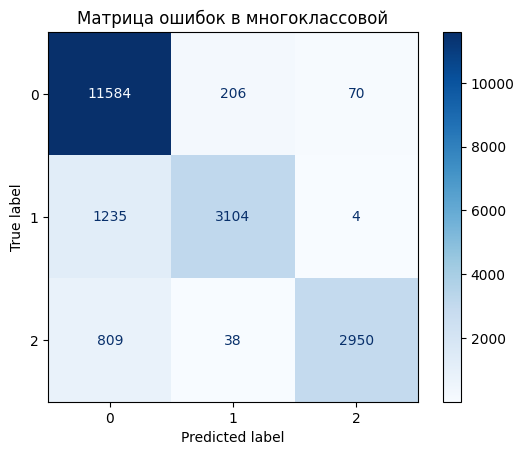

In [49]:
disp_Multi.plot(cmap=plt.cm.Blues)
plt.title('Матрица ошибок в многоклассовой')
plt.show()

Модель демонстрирует высокую точность и хорошие результаты по всем основным метрикам. Значение Accuracy равно 0.882. Точность и полнота также на высоком уровне, особенно для класса 0, где полнота составляет 0.98.
Однако есть некоторое снижение полноты для класса 1 (0.71), что указывает на то, что модель пропускает значительное количество примеров этого класса.

Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных
      > данных - исходных данных до разбиения

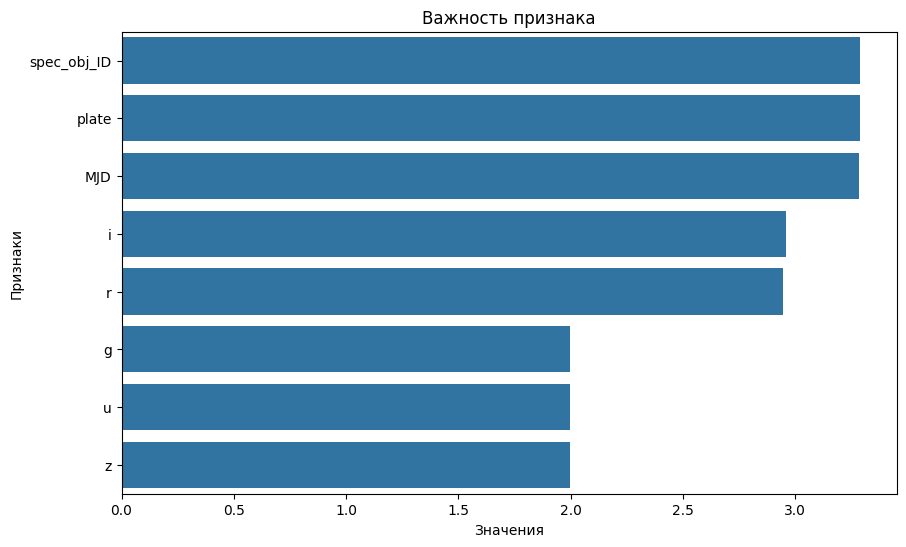

Наиболее важные признаки:
['spec_obj_ID', 'plate', 'MJD', 'i', 'r', 'g', 'u', 'z']


In [50]:
correlation_matrix = data.drop(columns = ['class']).corr()
data_array = correlation_matrix.values

np.fill_diagonal(data_array, 0)
threshold = 0.5

filtered_corr = correlation_matrix[abs(correlation_matrix) > threshold]

feature_importance = filtered_corr.sum()

feature_importance = feature_importance.sort_values(ascending=False)

plot_threshold = 1

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[feature_importance > plot_threshold].values, y=feature_importance[feature_importance > plot_threshold].index)
plt.title('Важность признака')
plt.xlabel('Значения')
plt.ylabel('Признаки')
plt.show()


selected_features = feature_importance[feature_importance.abs() > plot_threshold].index.tolist()
print("Наиболее важные признаки:")
print(selected_features)


In [51]:
X_train.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate', 'MJD',
       'fiber_ID'],
      dtype='object')

In [52]:
X_train_selected  = X_train[selected_features]
X_test_selected  = X_test[selected_features]
X_train_selected.columns

Index(['spec_obj_ID', 'plate', 'MJD', 'i', 'r', 'g', 'u', 'z'], dtype='object')

In [56]:
disp_Multi_Selected = func_Multi_KNeighborsClassifier(X_train_selected, y_train,X_test_selected, y_test,2,"Метрики на ненормированных данных выбранных признаках:")

Метрики на ненормированных данных выбранных признаках:
Accuracy: 0.683
Precision: 0.657
Recall: 0.683
F1 Score: 0.649

Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80     11860
           1       0.61      0.50      0.55      4343
           2       0.53      0.20      0.29      3797

    accuracy                           0.68     20000
   macro avg       0.62      0.54      0.55     20000
weighted avg       0.66      0.68      0.65     20000



Text(0.5, 1.0, 'Матрица ошибок с выбранными признаками')

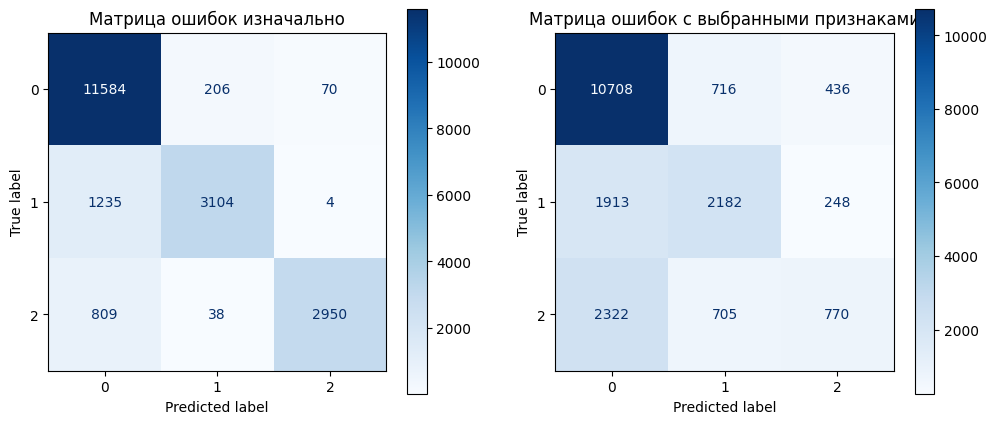

In [57]:
fig_1, axes_1 = plt.subplots(1, 2, figsize=(12, 5))
disp_Multi.plot(cmap=plt.cm.Blues, ax=axes_1[0])
axes_1[0].set_title('Матрица ошибок изначально')

disp_Multi_Selected.plot(cmap=plt.cm.Blues, ax=axes_1[1])
axes_1[1].set_title('Матрица ошибок с выбранными признаками')

На ненормированных данных выбранных признаков метрики модели значительно ухудшились по сравнению с ненормированными данными без отбора признаков. Особенно заметно ухудшение в полноте и F1-score для всех классов В частности, для класса 2 снижение метрик является наиболее выраженным, что говорит о серьезных проблемах с распознаванием этого класса при использовании выбранных признаков.

In [58]:
def Multi_enumerationOfHyperparameters(x_train, y_train, x_test, y_test):
    train_accuracy = []
    test_accuracy = []
    
    for n in range(1, 10):
        model = KNeighborsClassifier(n_neighbors = n, metric='euclidean')
        model.fit(x_train, y_train)
        train_accuracy.append(model.score(x_train, y_train, average='weighted'))
        test_accuracy.append(model.score(x_test, y_test, average='weighted'))
    
    plt.plot(range(1, 10), train_accuracy, label='Тренировочная')
    plt.plot(range(1, 10), test_accuracy, label='Тестовая')
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    


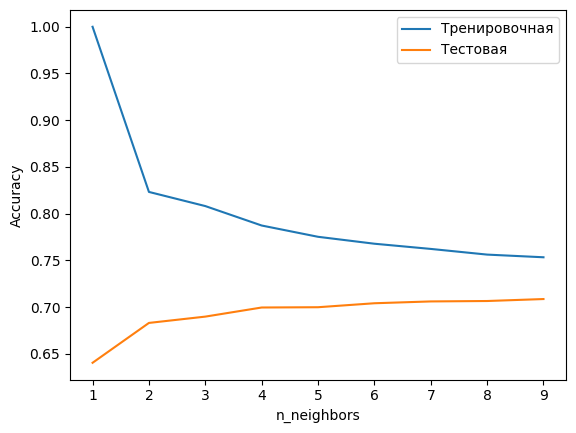

In [59]:
enumerationOfHyperparameters(X_train, y_train,X_test, y_test)

С увеличением n_neighbors увеличивается точнсть на тестовой выборке.